<h2 align="center">Image Compression with K-means Clustering</h2>

### Task 1: Importing Libraries
---

In [1]:
from __future__ import print_function
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use("ggplot")

from skimage import io
from sklearn.cluster import KMeans

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

In [2]:
plt.rcParams['figure.figsize'] = (20, 12)

### Task 2: Data Preprocessing 
---

In [3]:
img = io.imread('1-Saint-Basils-Cathedral.jpg')

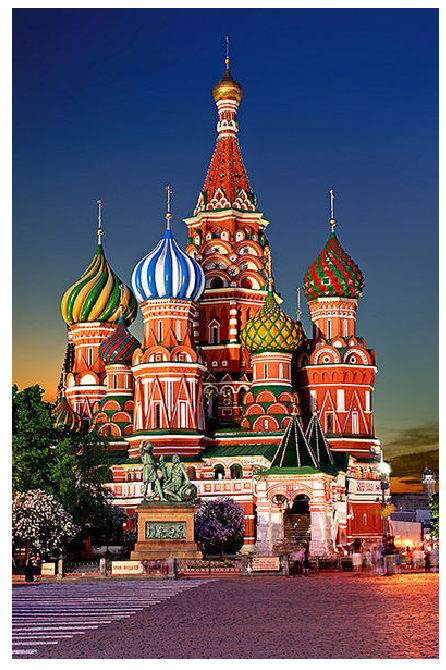

In [4]:
ax = plt.axes(xticks=[],yticks=[])
ax.imshow(img)

In [5]:
img

Array([[[ 15,  28,  73],
        [ 15,  28,  73],
        [ 15,  28,  73],
        ...,
        [ 13,  46, 115],
        [ 14,  47, 116],
        [ 14,  47, 116]],

       [[ 15,  28,  73],
        [ 15,  28,  73],
        [ 15,  28,  73],
        ...,
        [ 13,  46, 115],
        [ 13,  46, 115],
        [ 13,  46, 115]],

       [[ 15,  28,  73],
        [ 15,  28,  73],
        [ 15,  28,  73],
        ...,
        [ 13,  46, 115],
        [ 12,  45, 114],
        [ 12,  45, 114]],

       ...,

       [[ 92,  70,  93],
        [ 91,  72, 102],
        [ 84,  68, 105],
        ...,
        [205,  83,  96],
        [230, 102,  93],
        [230, 102,  93]],

       [[ 98,  82,  93],
        [ 96,  77,  99],
        [105,  80, 112],
        ...,
        [147,  63,  76],
        [160,  63,  83],
        [161,  64,  84]],

       [[ 90,  71,  73],
        [104,  77,  92],
        [116,  80, 106],
        ...,
        [179,  76,  67],
        [ 98,  57,  75],
        [ 95,  54,  72]]

In [6]:
img.shape

(600, 394, 3)

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()# Outputs the value between 0 and 1

In [9]:
img_scaled = scaler.fit_transform(img.reshape(600*394,3)) # Reshaping image to [600*394(pixels) , 3(R,G,B)]


In [10]:
img_scaled.shape

(236400, 3)

In [11]:
img_scaled

array([[0.05882353, 0.10980392, 0.28627451],
       [0.05882353, 0.10980392, 0.28627451],
       [0.05882353, 0.10980392, 0.28627451],
       ...,
       [0.70196078, 0.29803922, 0.2627451 ],
       [0.38431373, 0.22352941, 0.29411765],
       [0.37254902, 0.21176471, 0.28235294]])

### Task 3: Visualizing the Color Space using Point Clouds
---

In [12]:
from plot_utils import plot_utils

In [13]:
x = plot_utils(img_scaled,title="Original Image color space: over 16 Million colors")

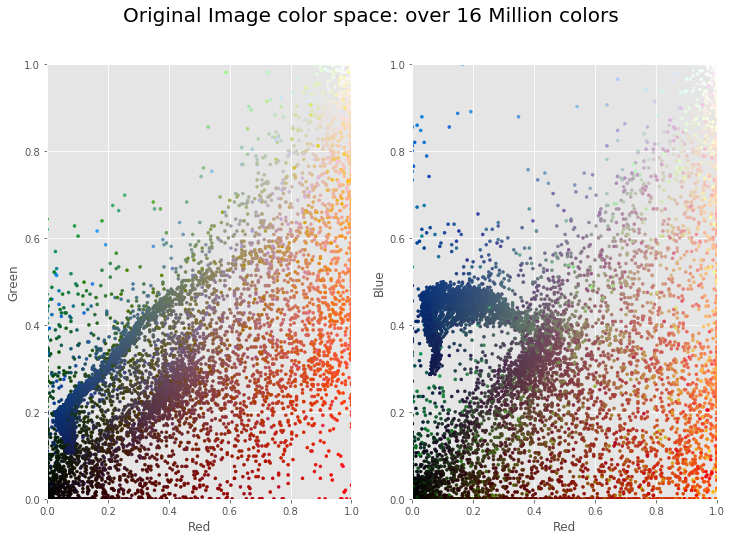

In [14]:
x.colorSpace()

There is smooth transition from one color to another and we will try to reduce the diversity of the colors and let the color have the sharp transition from one color to another.

### Task 4: Visualizing the K-means Reduced Color Space
---

<a title="Incheol [CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Kmeans_animation.gif"><img width="300" alt="Kmeans animation" src="https://upload.wikimedia.org/wikipedia/commons/d/d5/Kmeans_animation.gif"></a>
<h5 align="center">Incheol [<a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>], <a href="https://commons.wikimedia.org/wiki/File:Kmeans_animation.gif">via Wikimedia Commons</a></h5>

**K-means Algorithm**:

1. Initialization: Randomly sample $k$ colors from the input image. These are the initial $k$ means $\mu_1,\mu_2,...,\mu_k$.


2. For each pixel in the image, assign it to its nearest mean given by $$c^{(i)} := \textrm{argmin}_{j}\left \|x^{(i)} - \mu_j \right \|^2$$


3. Update the means using the pixel assignments from Step 2. $$\mu_j := \frac{\sum_{i}^{n}1\left \{c^{(i)} = j  \right \}x^{(i)}}{\sum_{i}^{n}1\left \{c^{(i)} = j  \right \}}$$


4. Repeat Steps 2 and 3 until convergence.

In [15]:
from sklearn.cluster import MiniBatchKMeans

 # We want to reduce the colors from 16 Million to only 16 colors as most of the colors are unused !!!!!

In [16]:
kmeans = MiniBatchKMeans(16)

In [17]:
kmeans.fit(img_scaled)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=16, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [37]:
 kmeans.cluster_centers_

array([[0.33895821, 0.40305011, 0.43269954],
       [0.08978085, 0.1344406 , 0.32632065],
       [0.95513898, 0.92221504, 0.86666667],
       [0.92554622, 0.33456583, 0.12084034],
       [0.23928105, 0.13339869, 0.07869281],
       [0.88677362, 0.52634581, 0.28948307],
       [0.06061778, 0.19518668, 0.43796938],
       [0.74310094, 0.21169208, 0.0942992 ],
       [0.40141654, 0.26064266, 0.28081712],
       [0.16829732, 0.28945578, 0.46702681],
       [0.14041394, 0.35076253, 0.13703704],
       [0.69846547, 0.6372549 , 0.64535379],
       [0.90512821, 0.71372549, 0.58582202],
       [0.04821791, 0.06361441, 0.03349754],
       [0.59996369, 0.48852578, 0.4496732 ],
       [0.48745838, 0.10277469, 0.04994451]])

In [24]:
kmeans.predict(img_scaled)

array([1, 1, 1, ..., 7, 8, 8], dtype=int32)

In [28]:
new_16_colors =  kmeans.cluster_centers_[kmeans.predict(img_scaled)]

## Now plotting these new 16 colors

In [29]:
y = plot_utils(img_scaled,colors=new_16_colors,title="Compressed Image : using only 16 colors")

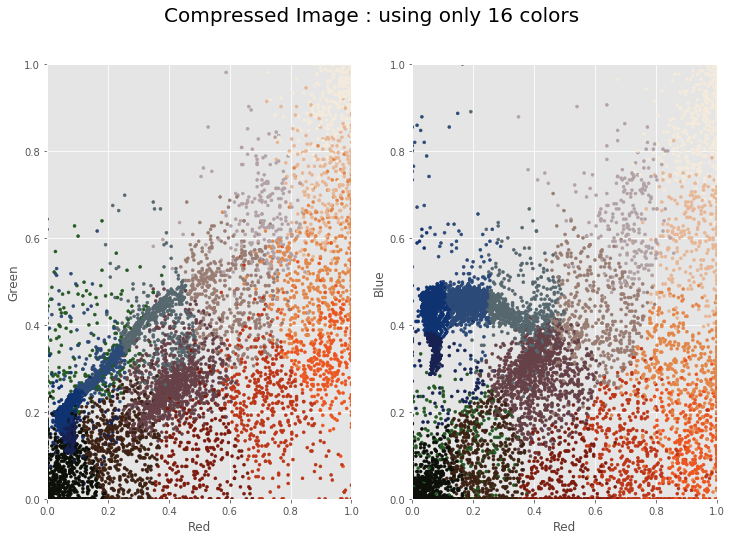

In [30]:
y.colorSpace()

## Saving image

***original image size = 95.6 KB***

***compressed image size = 61.2 KB***

In [42]:
io.imsave('c.jpg',new_16_colors.reshape(600,394,3)) 

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


### Here we can see the sharp transitions from one color to another as there are only 16 colors. Whereas using 16 M colors makes the transion much smoother! But as 16 <<<<< 16 million so we can achieve great compression and compression reatio is 1 million pixel.

### Task 5: K-means Image Compression with Interactive Controls
---